# HH 1952

code source: https://brian2.readthedocs.io/en/stable/examples/IF_curve_Hodgkin_Huxley.html

paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392213/

In [1]:
from brian2 import *

def HH1952(integrator):
    num_neurons = 100
    duration = .5*second

    # Parameters
    area = 20000*umetre**2
    Cm = 1*ufarad*cm**-2 * area
    gl = 5e-5*siemens*cm**-2 * area
    El = -65*mV
    EK = -90*mV
    ENa = 50*mV
    g_na = 100*msiemens*cm**-2 * area
    g_kd = 30*msiemens*cm**-2 * area
    VT = -63*mV

    # The model
    eqs = Equations('''
    dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
    dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
    dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
    dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
    I : amp
    ''')
    # Threshold and refractoriness are only used for spike counting
    group = NeuronGroup(num_neurons, eqs,
                        threshold='v > -40*mV',
                        refractory='v > -40*mV',
                        method='exponential_euler')
    group.v = El
    group.I = '0.7*nA * i / num_neurons'

    monitor = SpikeMonitor(group)

    run(duration)

    plot(group.I/nA, monitor.count / duration)
    xlabel('I (nA)')
    ylabel('Firing rate (sp/s)')
    show()



exponential_euler


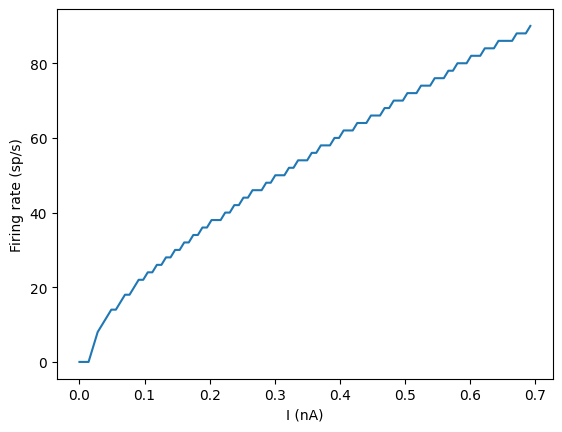

euler


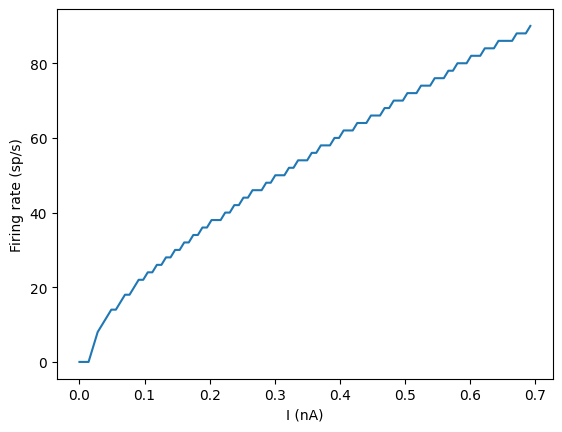

rk2


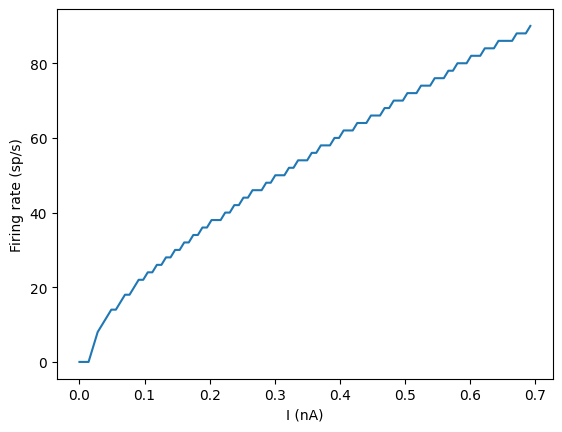

rk4


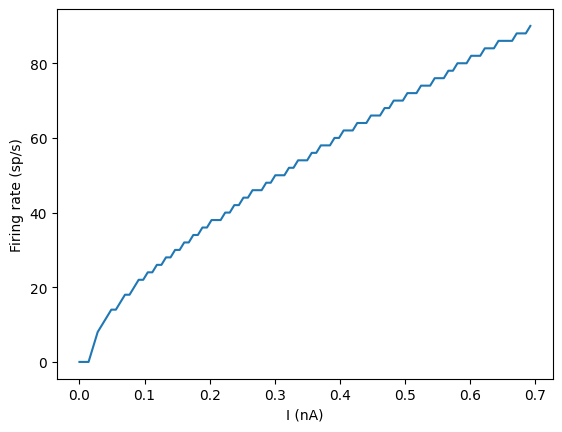

heun


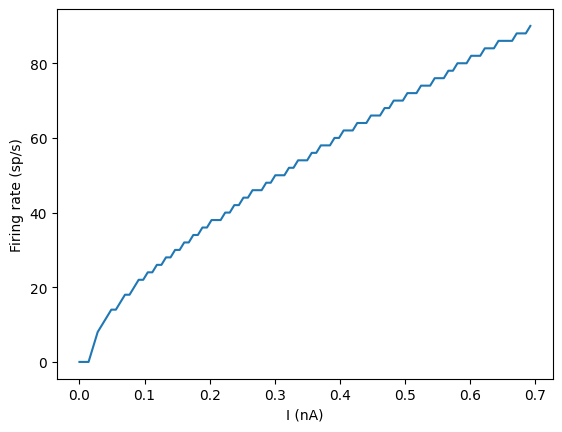

milstein


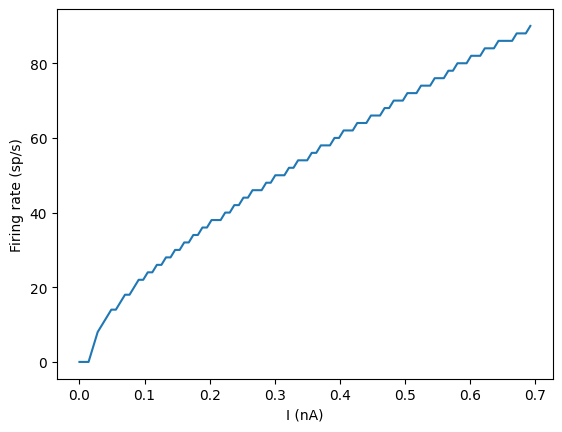

In [2]:
integrators=[#'exact', 
             'exponential_euler', 
             'euler', 
             'rk2', 
             'rk4', 
             'heun', 
             'milstein']

for integrator in integrators:
    print(integrator)
    HH1952(integrator)